In [1]:
from simulation_core import *
import simpy

## What do i want from this simulation?

- A plot of the distribution of the arrival times, for presentation reasons
- A plot showing the differences of the average waiting times between the number of the buses

In [ ]:
BUS_CAPACITY = 25  # Amount of passengers that each bus can carry
TRAVEL_TIME = 15    # Time it takes for a bus to travel to its destination
MAX_PASSENGERS = 500  # Maximum number of passengers that can be generated in the simulation
BASE_LAMBDA = 1 # Regulates the average arrival rate of passengers (1/lambda is the average time between arrivals)
SIMULATION_TIME = 240
PEAK_HOUR = 150  # Time in minutes when the peak hour starts (e.g., 150 minutes = 2 hours and 30 minutes)
PEAK_FACTOR = 5 # Factor by which the arrival rate increases during the peak hour
SMART_PERCENTAGE = 0.8  # Percentage of bus capacity that must be filled before the bus departs
SMART_TIME = 10  # Time the bus can wait before deciding to leave
SMART_DRIVER = True # Indicates if the bus driver is smart (True) or not (False)
TOTAL_BUSES = 4 # Total number of buses in the simulation
HYBRID = True # Indicates if the simulation uses a hybrid approach (True) or not (False)
SMART_LAST_BOARDING_TIME = 2 # Maximum time since the last boarding before the bus decides to leave
VERBOSE = False  # If True, prints detailed logs during the simulation

smart_driver = [True]
bus_amount  = [3]
configurations = []

# Simulate for different configurations
for TOTAL_BUSES in bus_amount :
    for SMART_DRIVER in smart_driver:
                # Create a new configuration for each combination of parameters
                configuration = Configuration(TOTAL_BUSES, SMART_DRIVER, SMART_TIME, SMART_PERCENTAGE, SMART_LAST_BOARDING_TIME,MAX_PASSENGERS)
                for i in range(500):  # Run n simulations for each configuration

                    env = simpy.Environment()

                    # This is the queue where passengers line up as they arrive
                    passenger_queue = simpy.Store(env)

                    # This Store manages which shuttle is ACTIVE for boarding at any given moment
                    # It has a capacity of 1, so only ONE shuttle can be placed here at a time.
                    # Shuttles "compete" to be here.
                    active_buses = simpy.Store(env, capacity=1)

                    # Start the bus processes
                    for i in range(TOTAL_BUSES):
                        navetta_obj = Bus(env, f'Bus_{i+1}', BUS_CAPACITY)
                        env.process(bus_process(env, navetta_obj, active_buses, passenger_queue,
                                                        SMART_DRIVER= SMART_DRIVER,
                                                            SMART_TIME=SMART_TIME,
                                                                SMART_PERCENTAGE=SMART_PERCENTAGE,
                                                                    TRAVEL_TIME=TRAVEL_TIME,
                                                                        HYBRID=HYBRID,
                                                                         verbose=VERBOSE
                                                                            ))

                    # Start the passenger generator
                    history = []  # List to keep track of passengers for the final report
                    env.process(participant_generator(env, passenger_queue, history,
                                                    tempo_massimo_simulazione=SIMULATION_TIME,
                                                        MAX_PASSENGERS=MAX_PASSENGERS,
                                                            PEAK_HOUR=PEAK_HOUR,
                                                                BASE_LAMBDA=BASE_LAMBDA,
                                                                    PEAK_FACTOR=PEAK_FACTOR,
                                                                        verbose=VERBOSE
                                                                            ))

                    # Run the simulation
                    print(f'--- Simulation started for {SIMULATION_TIME} minutes ---')
                    env.run(until=SIMULATION_TIME)
                    print('--- Simulation end ---')

                    configuration.history.append(history)  # Save the passenger history in the configuration
                configurations.append(configuration)

--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simulation started for 240 minutes ---
--- Simulation end ---
--- Simula

(array([ 8.,  4.,  2.,  4.,  3.,  3.,  2.,  3.,  3.,  3.,  4.,  3.,  5.,
         6.,  6.,  4., 12.,  4.,  7.,  8.,  4.,  8.,  9., 10., 13., 10.,
        12.,  8.,  5.,  7., 11., 15., 12.,  6.,  7., 14., 21., 15., 17.,
        15., 16., 15., 17., 15., 16., 23., 22., 21., 21., 21.]),
 array([  1.73209021,   5.00162913,   8.27116805,  11.54070696,
         14.81024588,  18.0797848 ,  21.34932371,  24.61886263,
         27.88840154,  31.15794046,  34.42747938,  37.69701829,
         40.96655721,  44.23609613,  47.50563504,  50.77517396,
         54.04471288,  57.31425179,  60.58379071,  63.85332962,
         67.12286854,  70.39240746,  73.66194637,  76.93148529,
         80.20102421,  83.47056312,  86.74010204,  90.00964096,
         93.27917987,  96.54871879,  99.8182577 , 103.08779662,
        106.35733554, 109.62687445, 112.89641337, 116.16595229,
        119.4354912 , 122.70503012, 125.97456904, 129.24410795,
        132.51364687, 135.78318578, 139.0527247 , 142.32226362,
        145.

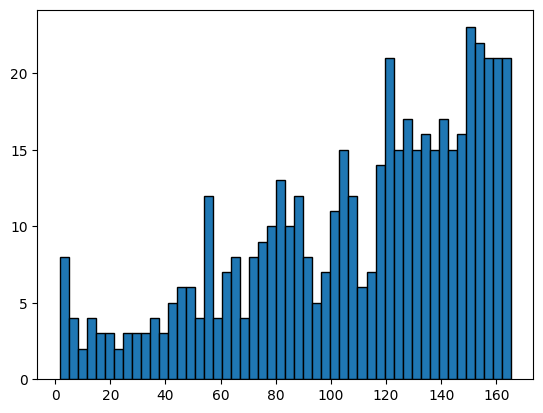

In [7]:
import matplotlib.pyplot as plt

# Plot the number of passengers boarded over time
times = [p.time_arrival for p in history]
plt.hist(times, bins=50, edgecolor='black')

In [5]:
average_waiting_times = []
for config in configurations:
    print(f'Configurazione: {config.num_navette} navette, Smart Driver: {config.smart_driver}, Smart Time: {config.smart_time}, Smart Percentage: {config.smart_percentage}')
    total_passengers = sum(len(history) for history in config.history)
    print(f'Totale passeggeri imbarcati: {total_passengers}')
    average_waiting_times.append(sum(p.time_departure - p.time_arrival for history in config.history for p in history if p.time_departure is not None) / total_passengers)
    print(f'Tempo medio di attesa per i passeggeri: {average_waiting_times[-1]:.2f} minuti')

Configurazione: 3 navette, Smart Driver: True, Smart Time: 10, Smart Percentage: 0.8
Totale passeggeri imbarcati: 250000
Tempo medio di attesa per i passeggeri: 3.97 minuti


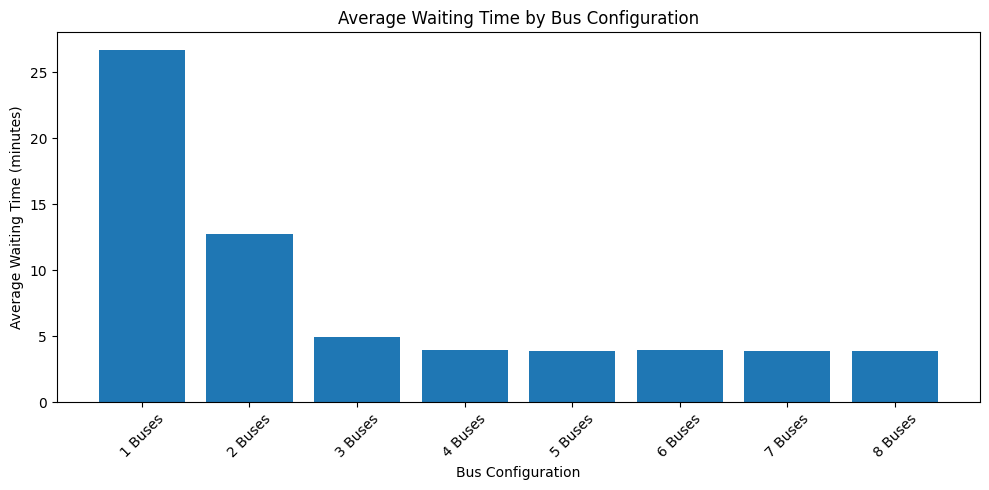

In [14]:
# Plot the average waiting times for each configuration
plt.figure(figsize=(10, 5))
plt.bar([f'{config.num_navette} Buses' for config in configurations], average_waiting_times)
plt.xlabel('Bus Configuration')
plt.ylabel('Average Waiting Time (minutes)')
plt.title('Average Waiting Time by Bus Configuration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(array([1.662e+03, 7.810e+02, 8.910e+02, 8.830e+02, 1.084e+03, 1.179e+03,
        1.286e+03, 1.307e+03, 1.258e+03, 1.288e+03, 1.187e+03, 1.011e+03,
        1.072e+03, 9.450e+02, 8.530e+02, 7.720e+02, 7.180e+02, 6.000e+02,
        6.020e+02, 5.160e+02, 4.310e+02, 4.460e+02, 4.170e+02, 3.990e+02,
        3.280e+02, 3.090e+02, 2.760e+02, 2.440e+02, 2.430e+02, 2.640e+02,
        2.240e+02, 2.040e+02, 1.640e+02, 1.380e+02, 1.320e+02, 1.360e+02,
        8.600e+01, 5.400e+01, 4.700e+01, 3.100e+01, 2.100e+01, 2.600e+01,
        1.300e+01, 1.200e+01, 1.000e+01, 5.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00]),
 array([ 0.        ,  0.44459357,  0.88918713,  1.3337807 ,  1.77837427,
         2.22296783,  2.6675614 ,  3.11215496,  3.55674853,  4.0013421 ,
         4.44593566,  4.89052923,  5.3351228 ,  5.77971636,  6.22430993,
         6.6689035 ,  7.11349706,  7.55809063,  8.0026842 ,  8.44727776,
         8.89187133,  9.33646489,  9.78105846, 10.22565203, 10.67024559,
        11.

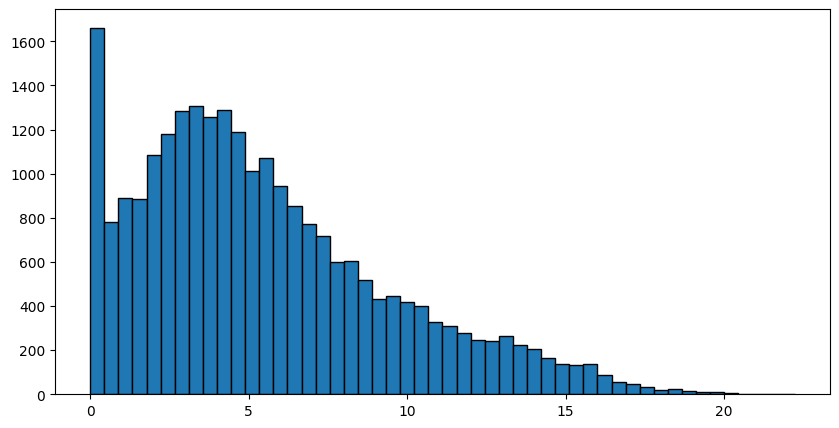

In [ ]:
# plot distribution of waiting times for a specific configuration
plt.figure(figsize=(10, 5))
waiting_times = [p.time_departure - p.time_arrival for history in configurations[0].history for p in history if p.time_departure is not None]
plt.hist(waiting_times, bins=50, edgecolor='black')

In [15]:
# print maximum waiting time for each configuration and the arrival time of the maximum waiting time
print("\nMassimo tempo di attesa per ogni configurazione:")
for config in configurations:
    for history in config.history:
        curren_max = None
        for p in history:
            if p.time_departure is not None:
                waiting_time = p.time_departure - p.time_arrival
                if curren_max is None or waiting_time > curren_max[0]:
                    curren_max = (waiting_time, p.time_arrival, config.num_navette, config.smart_driver, config.smart_time, config.smart_percentage)
        print(f'maximum waiting time: {curren_max[0]:.2f} minutes, arrival time: {curren_max[1]:.2f} minutes, configuration: {curren_max[2]} buses, smart driver: {curren_max[3]}, smart time: {curren_max[4]}, smart percentage: {curren_max[5]}')



Massimo tempo di attesa per ogni configurazione:
maximum waiting time: 26.39 minutes, arrival time: 0.62 minutes, configuration: 3 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 22.79 minutes, arrival time: 0.58 minutes, configuration: 3 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 36.45 minutes, arrival time: 1.85 minutes, configuration: 3 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 21.33 minutes, arrival time: 0.04 minutes, configuration: 3 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 23.79 minutes, arrival time: 0.69 minutes, configuration: 3 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 20.48 minutes, arrival time: 0.01 minutes, configuration: 3 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 25.58 minutes, arrival time: 1.88 minute

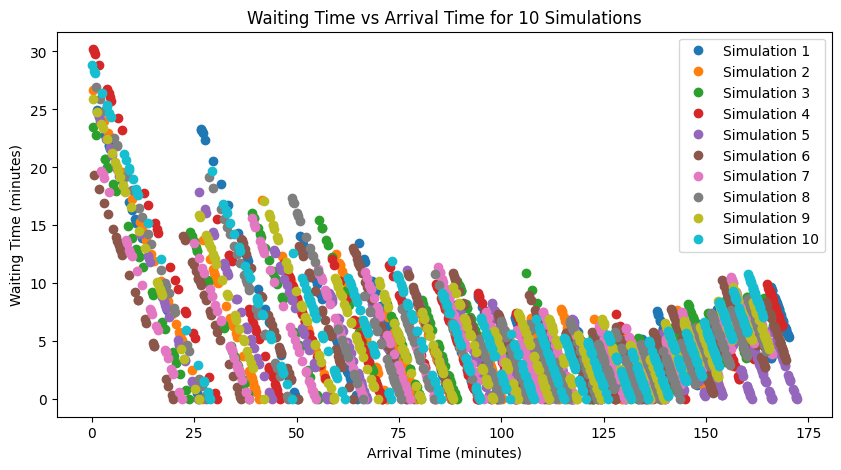

In [13]:
# plot the waiting times of 10 simulatrions on y axis and the arrival times on x axis
plt.figure(figsize=(10, 5))
for i, history in enumerate(configurations[0].history[:10]):  # Prendi le prime 10 simulazioni
    arrival_times = [p.time_arrival for p in history if p.time_departure is not None]
    waiting_times = [p.time_departure - p.time_arrival for p in history if p.time_departure is not None]
    plt.plot(arrival_times, waiting_times, marker='o', linestyle='', label=f'Simulation {i+1}')
plt.xlabel('Arrival Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('Waiting Time vs Arrival Time for 10 Simulations')
plt.legend()
plt.show()